## 1) Import modules

In [1]:
import os

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

## 2) Load Data

In [2]:
# List files available
print(os.listdir("input/"))

# Reading the data
dataset = pd.read_csv('input/train.csv',  index_col='id', parse_dates = ['purchase_date', 'release_date'])

print('Dataset shape: ', dataset.shape)
print(dataset.info())
dataset.head(2)

['samplesubmission.csv', 'test.csv', 'train.csv']
Dataset shape:  (357, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 356
Data columns (total 10 columns):
playtime_forever          357 non-null float64
is_free                   357 non-null bool
price                     357 non-null float64
genres                    357 non-null object
categories                357 non-null object
tags                      357 non-null object
purchase_date             355 non-null datetime64[ns]
release_date              357 non-null datetime64[ns]
total_positive_reviews    355 non-null float64
total_negative_reviews    355 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(4), object(3)
memory usage: 28.2+ KB
None


,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
id,,,,,,,,,,
0,0.000000,False,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,Exploration,First-Person,Stealth,Choices Matter,Singleplayer,Walking Simulator,Short,Drama",2018-07-02,2013-12-10,372.0,96.0
1,0.016667,True,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplayer,Free to Play",2016-11-26,2015-08-12,23.0,0.0


In [3]:
# Reading the test data
test_df = pd.read_csv('input/test.csv',  index_col='id', parse_dates = ['purchase_date', 'release_date'])
print('Test data shape: ', test_df.shape)
print(test_df.info())
test_df.head(2)

Test data shape:  (90, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 9 columns):
is_free                   90 non-null bool
price                     90 non-null int64
genres                    90 non-null object
categories                90 non-null object
tags                      90 non-null object
purchase_date             88 non-null datetime64[ns]
release_date              90 non-null datetime64[ns]
total_positive_reviews    88 non-null float64
total_negative_reviews    88 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.4+ KB
None


,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
id,,,,,,,,,
0,False,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singleplayer,Thriller,Third-Person Shooter,Psychological Horror,Mystery,Arcade,Atmospheric,Shooter,Cinematic,Survival Horror,Detective,Story Rich,Survival,Supernatural,Controller,Short",2018-10-28,2012-05-22,2607.0,1122.0
1,False,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player,Cross-Platform Multiplayer,Steam Achievements,Steam Trading Cards,Steam Cloud","Mechs,Strategy,Turn-Based,Turn-Based Tactics,Sci-fi,Turn-Based Strategy,Tactical,Robots,Singleplayer,Multiplayer,RPG,Action,Futuristic,Space,Character Customization,Management,Adventure,Story Rich,Great Soundtrack,Difficult",2019-07-20,2018-04-24,5762.0,2235.0


## 3) Data Pre-processing

### 3.1) Filling Missing Data

In [4]:
for column in ['total_positive_reviews','total_negative_reviews']:
        dataset[column] = dataset[column].interpolate()
        test_df[column] = test_df[column].interpolate()

dataset['purchase_date'] = dataset['purchase_date'].ffill()
test_df['purchase_date'] = test_df['purchase_date'].ffill()

### 3.2) Handling datetime Data

In [5]:
def extract_date_columns(df,columns):
    for column in columns:
        df[column+'_year'] = df[column].apply(lambda x: x.year)
        df[column+'_month'] = df[column].apply(lambda x: x.month)
        df[column+'_day'] = df[column].apply(lambda x: x.day) # For timestamp the member is 'day'
        
def get_days_between(df,before_col,after_col):
    df['date_diff'] = (df[after_col] - df[before_col]).apply(lambda x: x.days)
    
def get_timestamp(df,columns):
    for column in columns:
        df[column+'_timestamp'] = df[column].apply(lambda x: x.timestamp())


date_columns = ['release_date','purchase_date']
get_timestamp(dataset,date_columns)
get_timestamp(test_df,date_columns)

# logical filter: release date cant be more than purchase date
dataset = dataset[dataset['purchase_date_timestamp'] >= dataset['release_date_timestamp']]

get_days_between(dataset,'release_date','purchase_date')
get_days_between(test_df,'release_date','purchase_date')

extract_date_columns(dataset,date_columns)
extract_date_columns(test_df,date_columns)

dataset.drop(date_columns, axis=1, inplace=True)
test_df.drop(date_columns, axis=1, inplace=True)

### 3.3) Filter out Outliers relative to Target column

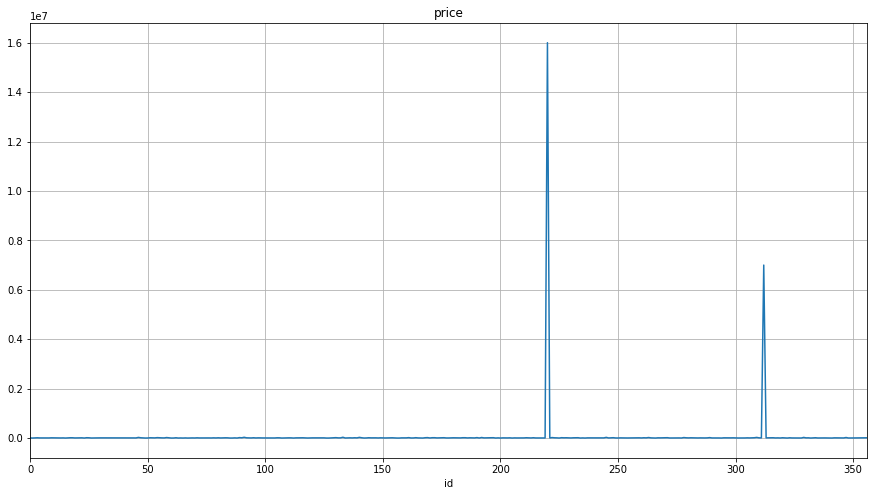

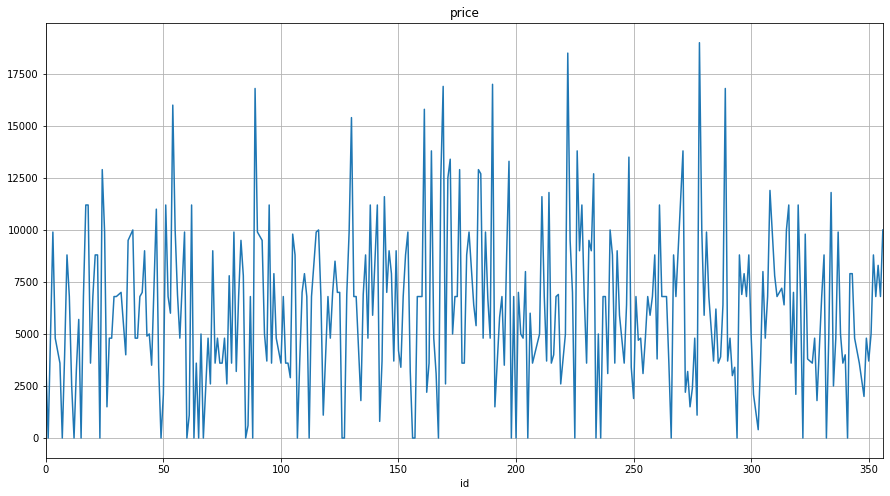

In [6]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    tolerance = 2
    fence_low  = q1 - tolerance*iqr
    fence_high = q3 + tolerance*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


ncols = ['price']

for column in ncols:
    plt.figure()
    dataset[column].plot(figsize=(15,8), grid = True, title=column)
    
    dataset = remove_outlier(dataset,column)
    
    plt.figure()
    dataset[column].plot(figsize=(15,8), grid = True, title=column)
    plt.show()


dataset = dataset[dataset['playtime_forever'] < 60]
# dataset['playtime_forever'].plot(figsize=(15,8), grid = True, title='playtime_forever')
    
# ------------- Reset index -------------
dataset.reset_index(inplace=True, drop=True) 

### 3.4) Handling Boolean Data

In [7]:
dataset['is_free'] = dataset['is_free'].astype(int)
test_df['is_free'] = test_df['is_free'].astype(int)

### 3.5) Encoding Categorical Data

In [8]:
def hot_encode(df,columns):
    for column in columns:
        dummy_df = df[column].str.get_dummies(",").add_prefix(column + '_')
        dummy_df.columns = dummy_df.columns.str.replace(' ', '_').str.lower()
        df = df.join(dummy_df)
    return df


categorical_columns = ["genres", "categories", "tags"]

test_df = hot_encode(test_df,categorical_columns) # Splitting grouped string type category into separate columns
test_df.drop(categorical_columns, axis=1, inplace=True)

dataset = hot_encode(dataset,categorical_columns) # Splitting grouped string type category into separate columns
dataset.drop(categorical_columns, axis=1, inplace=True)

# ----------- Extracting only available columns in test data -------------
X = dataset.drop('playtime_forever',axis=1)
Y = dataset['playtime_forever']

avail_cols = list(set(dataset.columns) & set(test_df.columns))
X = X[avail_cols]
test_df = test_df[avail_cols]
X.head(2)

,tags_mod,tags_crowdfunded,tags_procedural_generation,tags_simulation,tags_realistic,tags_economy,tags_replay_value,categories_remote_play_on_tablet,categories_includes_source_sdk,tags_surreal,tags_fantasy,genres_early_access,tags_dungeon_crawler,tags_arcade,tags_funny,tags_war,tags_casual,tags_inventory_management,tags_minigames,tags_illuminati,tags_noir,tags_world_war_ii,tags_magic,tags_visual_novel,tags_top-down_shooter,genres_simulation,categories_steam_cloud,categories_steamvr_collectibles,tags_hex_grid,tags_rogue-like,tags_kickstarter,tags_superhero,tags_comedy,tags_mythology,tags_rts,tags_turn-based,tags_experimental,tags_side_scroller,genres_massively_multiplayer,tags_2d,tags_action-adventure,tags_remake,tags_steampunk,tags_platformer,tags_online_co-op,tags_story_rich,tags_team-based,tags_hack_and_slash,tags_loot,tags_dynamic_narration,tags_old_school,tags_puzzle,categories_online_multi-player,tags_games_workshop,categories_local_multi-player,tags_rpgmaker,tags_military,tags_rogue-lite,tags_ninja,tags_resource_management,tags_mature,tags_crpg,genres_adventure,tags_minimalist,tags_survival,tags_science,tags_nature,price,tags_dark_humor,tags_time_travel,tags_turn-based_combat,categories_co-op,tags_3d_vision,tags_shooter,tags_cinematic,tags_silent_protagonist,tags_turn-based_strategy,genres_nudity,tags_narration,tags_family_friendly,tags_assassin,genres_sports,tags_atmospheric,tags_jrpg,tags_zombies,tags_supernatural,tags_rhythm,tags_space_sim,tags_philisophical,tags_parody,categories_commentary_available,tags_drama,tags_real_time_tactics,tags_short,tags_thriller,categories_local_co-op,tags_crime,genres_indie,categories_vr_support,tags_3d_platformer,tags_alternate_history,genres_casual,tags_america,tags_detective,tags_exploration,tags_futuristic,tags_survival_horror,tags_trading,tags_fps,tags_pvp,tags_historical,tags_hunting,tags_third-person_shooter,tags_moddable,tags_violent,categories_steam_achievements,tags_dinosaurs,purchase_date_day,tags_beautiful,purchase_date_timestamp,tags_classic,is_free,tags_villain_protagonist,tags_relaxing,tags_turn-based_tactics,tags_massively_multiplayer,tags_submarine,categories_single-player,tags_city_builder,tags_time_manipulation,categories_includes_level_editor,categories_steam_trading_cards,tags_emotional,tags_free_to_play,tags_linear,tags_anime,tags_driving,tags_pixel_graphics,tags_base_building,categories_captions_available,tags_party-based_rpg,tags_dystopian,tags_sandbox,tags_real-time,tags_colorful,tags_lovecraftian,tags_stylized,release_date_year,tags_education,tags_early_access,tags_great_soundtrack,tags_esports,tags_horror,tags_vr,tags_first-person,purchase_date_month,tags_adventure,tags_controller,categories_remote_play_on_phone,tags_based_on_a_novel,tags_masterpiece,purchase_date_year,tags_action_rpg,tags_level_editor,tags_nonlinear,tags_retro,tags_blood,tags_robots,categories_full_controller_support,tags_building,tags_fmv,genres_rpg,tags_bullet_time,genres_action,tags_fighting,tags_mechs,tags_open_world,categories_stats,tags_walking_simulator,tags_dark_fantasy,tags_heist,tags_western,tags_4x,tags_local_co-op,categories_shared/split_screen,categories_online_co-op,categories_cross-platform_multiplayer,tags_demons,tags_isometric,genres_violent,tags_hacking,categories_steam_workshop,tags_dating_sim,release_date_day,tags_dark,tags_warhammer_40k,tags_sci-fi,tags_point_&_click,tags_character_customization,tags_dragons,release_date_month,tags_crafting,tags_epic,tags_gore,tags_multiplayer,tags_episodic,tags_rpg,tags_choices_matter,tags_interactive_fiction,tags_female_protagonist,tags_underwater,categories_steam_leaderboards,total_positive_reviews,tags_cartoony,genres_strategy,tags_shoot_'em_up,tags_aliens,tags_space,tags_stealth,tags_local_multiplayer,tags_diplomacy,tags_parkour,tags_split_screen,tags_third_person,tags_hand-drawn,tags_top-down,tags_post-apocalyptic,tags_sexual_content,tags_beat_'em_up,tags_moba,tags_puzzle-platformer,total_negative_reviews,categories_partial_controll

### 3.6) Cleaned Data summary

In [9]:
print('Dataset shape: ', dataset.shape)
print(dataset.info())
dataset.head(2)

Dataset shape:  (326, 371)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Columns: 371 entries, playtime_forever to tags_esports
dtypes: float64(6), int64(365)
memory usage: 945.0 KB
None


,playtime_forever,is_free,price,total_positive_reviews,total_negative_reviews,release_date_timestamp,purchase_date_timestamp,date_diff,release_date_year,release_date_month,release_date_day,purchase_date_year,purchase_date_month,purchase_date_day,genres_action,genres_adventure,genres_animation_&_modeling,genres_audio_production,genres_casual,genres_design_&_illustration,genres_early_access,genres_free_to_play,genres_gore,genres_indie,genres_massively_multiplayer,genres_nudity,genres_rpg,genres_racing,genres_sexual_content,genres_simulation,genres_sports,genres_strategy,genres_utilities,genres_violent,categories_captions_available,categories_co-op,categories_commentary_available,categories_cross-platform_multiplayer,categories_full_controller_support,categories_in-app_purchases,categories_includes_source_sdk,categories_includes_level_editor,categories_local_co-op,categories_local_multi-player,categories_mmo,categories_multi-player,categories_online_co-op,categories_online_multi-player,categories_partial_controller_support,categories_remote_play_on_phone,categories_remote_play_on_tv,categories_remote_play_on_tablet,categories_shared/split_screen,categories_single-player,categories_stats,categories_steam_achievements,categories_steam_cloud,categories_steam_leaderboards,categories_steam_trading_cards,categories_steam_workshop,categories_steamvr_collectibles,categories_vr_support,categories_valve_anti-cheat_enabled,tags_1980s,tags_1990's,tags_2.5d,tags_2d,tags_3d,tags_3d_platformer,tags_3d_vision,tags_4_player_local,tags_4x,tags_atv,tags_action,tags_action_rpg,tags_action-adventure,tags_addictive,tags_adventure,tags_aliens,tags_alternate_history,tags_america,tags_animation_&_modeling,tags_anime,tags_arcade,tags_arena_shooter,tags_artificial_intelligence,tags_assassin,tags_atmospheric,tags_audio_production,tags_automation,tags_base_building,tags_based_on_a_novel,tags_batman,tags_battle_royale,tags_beat_'em_up,tags_beautiful,tags_benchmark,tags_bikes,tags_blood,tags_board_game,tags_building,tags_bullet_hell,tags_bullet_time,tags_crpg,tags_capitalism,tags_card_game,tags_cartoon,tags_cartoony,tags_casual,tags_cats,tags_character_action_game,tags_character_customization,tags_chess,tags_choices_matter,tags_choose_your_own_adventure,tags_cinematic,tags_city_builder,tags_classic,tags_clicker,tags_co-op,tags_co-op_campaign,tags_colorful,tags_comedy,tags_comic_book,tags_competitive,tags_conspiracy,tags_controller,tags_crafting,tags_crime,tags_crowdfunded,tags_cult_classic,tags_cute,tags_cyberpunk,tags_dark,tags_dark_comedy,tags_dark_fantasy,tags_dark_humor,tags_dating_sim,tags_demons,tags_design_&_illustration,tags_destruction,tags_detective,tags_difficult,tags_dinosaurs,tags_diplomacy,tags_documentary,tags_dragons,tags_drama,tags_driving,tags_dungeon_crawler,tags_dungeons_&_dragons,tags_dynamic_narration,tags_dystopian,tags_early_access,tags_economy,tags_education,tags_emotional,tags_epic,tags_episodic,tags_experience,tags_experimental,tags_exploration,tags_fmv,tags_fps,tags_family_friendly,tags_fantasy,tags_fast-paced,tags_female_protagonist,tags_fighting,tags_first-person,tags_flight,tags_free_to_play,tags_funny,tags_futuristic,tags_game_development,tags_games_workshop,tags_god_game,tags_gore,tags_gothic,tags_grand_strategy,tags_great_soundtrack,tags_gun_customization,tags_hack_and_slash,tags_hacking,tags_hand-drawn,tags_heist,tags_hex_grid,tags_hidden_object,tags_historical,tags_horror,tags_horses,tags_hunting,tags_illuminati,tags_immersive_sim,tags_indie,tags_interactive_fiction,tags_inventory_management,tags_investigation,tags_isometric,tags_jrpg,tags_kickstarter,tags_lgbtq+,tags_lara_croft,tags_level_editor,tags_linear,tags_local_co-op,tags_local_multiplayer,tags_logic,tags_loot,tags_lovecraftian,tags_mmorpg,tags_moba,tags_magic,tags_management,tags_mars,tags_martial_arts,tags_massively_multiplayer,tags_masterpiece,tags_mature,tags_mechs,tags_medieval,tags_memes,tags_metroidvania,tags_military,tags_minigames,tags_minimalist,tags_mod,ta

In [10]:
print('Test data shape: ', test_df.shape)
print(test_df.info())
test_df.head(2)

Test data shape:  (90, 278)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Columns: 278 entries, tags_mod to tags_political
dtypes: float64(4), int64(274)
memory usage: 198.7 KB
None


,tags_mod,tags_crowdfunded,tags_procedural_generation,tags_simulation,tags_realistic,tags_economy,tags_replay_value,categories_remote_play_on_tablet,categories_includes_source_sdk,tags_surreal,tags_fantasy,genres_early_access,tags_dungeon_crawler,tags_arcade,tags_funny,tags_war,tags_casual,tags_inventory_management,tags_minigames,tags_illuminati,tags_noir,tags_world_war_ii,tags_magic,tags_visual_novel,tags_top-down_shooter,genres_simulation,categories_steam_cloud,categories_steamvr_collectibles,tags_hex_grid,tags_rogue-like,tags_kickstarter,tags_superhero,tags_comedy,tags_mythology,tags_rts,tags_turn-based,tags_experimental,tags_side_scroller,genres_massively_multiplayer,tags_2d,tags_action-adventure,tags_remake,tags_steampunk,tags_platformer,tags_online_co-op,tags_story_rich,tags_team-based,tags_hack_and_slash,tags_loot,tags_dynamic_narration,tags_old_school,tags_puzzle,categories_online_multi-player,tags_games_workshop,categories_local_multi-player,tags_rpgmaker,tags_military,tags_rogue-lite,tags_ninja,tags_resource_management,tags_mature,tags_crpg,genres_adventure,tags_minimalist,tags_survival,tags_science,tags_nature,price,tags_dark_humor,tags_time_travel,tags_turn-based_combat,categories_co-op,tags_3d_vision,tags_shooter,tags_cinematic,tags_silent_protagonist,tags_turn-based_strategy,genres_nudity,tags_narration,tags_family_friendly,tags_assassin,genres_sports,tags_atmospheric,tags_jrpg,tags_zombies,tags_supernatural,tags_rhythm,tags_space_sim,tags_philisophical,tags_parody,categories_commentary_available,tags_drama,tags_real_time_tactics,tags_short,tags_thriller,categories_local_co-op,tags_crime,genres_indie,categories_vr_support,tags_3d_platformer,tags_alternate_history,genres_casual,tags_america,tags_detective,tags_exploration,tags_futuristic,tags_survival_horror,tags_trading,tags_fps,tags_pvp,tags_historical,tags_hunting,tags_third-person_shooter,tags_moddable,tags_violent,categories_steam_achievements,tags_dinosaurs,purchase_date_day,tags_beautiful,purchase_date_timestamp,tags_classic,is_free,tags_villain_protagonist,tags_relaxing,tags_turn-based_tactics,tags_massively_multiplayer,tags_submarine,categories_single-player,tags_city_builder,tags_time_manipulation,categories_includes_level_editor,categories_steam_trading_cards,tags_emotional,tags_free_to_play,tags_linear,tags_anime,tags_driving,tags_pixel_graphics,tags_base_building,categories_captions_available,tags_party-based_rpg,tags_dystopian,tags_sandbox,tags_real-time,tags_colorful,tags_lovecraftian,tags_stylized,release_date_year,tags_education,tags_early_access,tags_great_soundtrack,tags_esports,tags_horror,tags_vr,tags_first-person,purchase_date_month,tags_adventure,tags_controller,categories_remote_play_on_phone,tags_based_on_a_novel,tags_masterpiece,purchase_date_year,tags_action_rpg,tags_level_editor,tags_nonlinear,tags_retro,tags_blood,tags_robots,categories_full_controller_support,tags_building,tags_fmv,genres_rpg,tags_bullet_time,genres_action,tags_fighting,tags_mechs,tags_open_world,categories_stats,tags_walking_simulator,tags_dark_fantasy,tags_heist,tags_western,tags_4x,tags_local_co-op,categories_shared/split_screen,categories_online_co-op,categories_cross-platform_multiplayer,tags_demons,tags_isometric,genres_violent,tags_hacking,categories_steam_workshop,tags_dating_sim,release_date_day,tags_dark,tags_warhammer_40k,tags_sci-fi,tags_point_&_click,tags_character_customization,tags_dragons,release_date_month,tags_crafting,tags_epic,tags_gore,tags_multiplayer,tags_episodic,tags_rpg,tags_choices_matter,tags_interactive_fiction,tags_female_protagonist,tags_underwater,categories_steam_leaderboards,total_positive_reviews,tags_cartoony,genres_strategy,tags_shoot_'em_up,tags_aliens,tags_space,tags_stealth,tags_local_multiplayer,tags_diplomacy,tags_parkour,tags_split_screen,tags_third_person,tags_hand-drawn,tags_top-down,tags_post-apocalyptic,tags_sexual_content,tags_beat_'em_up,tags_moba,tags_puzzle-platformer,total_negative_reviews,categories_partial_controll

## 4) Splitting the dataset into Training set and Test set

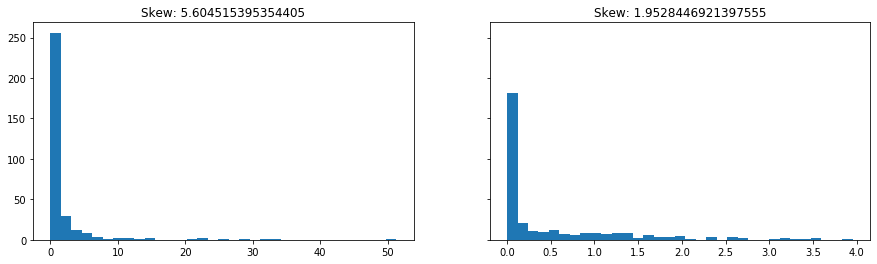

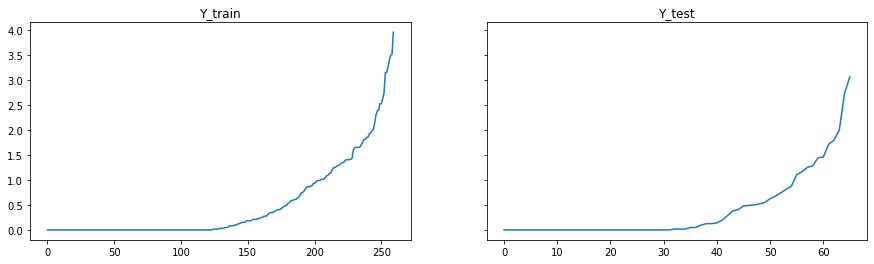

In [11]:
from scipy import stats

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
ax1.hist(Y, bins=33)
ax1.set_title('Skew: '+str(Y.skew()))

# y_bc, lmda = stats.boxcox(Y+1)
# Y = pd.Series(y_bc)

Y = pd.Series(np.log(Y+1))

ax2.hist(Y, bins=33)
ax2.set_title('Skew: '+str(Y.skew()))

plt.show()

# Dataset split with stratification

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
ax1.plot(np.sort(Y_train))
ax1.set_title('Y_train')

ax2.plot(np.sort(Y_test))
ax2.set_title('Y_test')

plt.show()

## 5) Feature Scaling: Normalization (Standardization)

In [12]:
col_names = X.columns
# col_names = ['price', 'total_positive_reviews', 'total_negative_reviews', 'release_date_timestamp', 'purchase_date_timestamp', 'date_diff', 'release_date_year', 'release_date_month', 'release_date_day', 'purchase_date_year', 'purchase_date_month','purchase_date_day']

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=col_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns=col_names)

scaler = StandardScaler()
scaler.fit(X)
test_df = pd.DataFrame(scaler.transform(test_df), columns=col_names)

X_train.head()

,tags_mod,tags_crowdfunded,tags_procedural_generation,tags_simulation,tags_realistic,tags_economy,tags_replay_value,categories_remote_play_on_tablet,categories_includes_source_sdk,tags_surreal,tags_fantasy,genres_early_access,tags_dungeon_crawler,tags_arcade,tags_funny,tags_war,tags_casual,tags_inventory_management,tags_minigames,tags_illuminati,tags_noir,tags_world_war_ii,tags_magic,tags_visual_novel,tags_top-down_shooter,genres_simulation,categories_steam_cloud,categories_steamvr_collectibles,tags_hex_grid,tags_rogue-like,tags_kickstarter,tags_superhero,tags_comedy,tags_mythology,tags_rts,tags_turn-based,tags_experimental,tags_side_scroller,genres_massively_multiplayer,tags_2d,tags_action-adventure,tags_remake,tags_steampunk,tags_platformer,tags_online_co-op,tags_story_rich,tags_team-based,tags_hack_and_slash,tags_loot,tags_dynamic_narration,tags_old_school,tags_puzzle,categories_online_multi-player,tags_games_workshop,categories_local_multi-player,tags_rpgmaker,tags_military,tags_rogue-lite,tags_ninja,tags_resource_management,tags_mature,tags_crpg,genres_adventure,tags_minimalist,tags_survival,tags_science,tags_nature,price,tags_dark_humor,tags_time_travel,tags_turn-based_combat,categories_co-op,tags_3d_vision,tags_shooter,tags_cinematic,tags_silent_protagonist,tags_turn-based_strategy,genres_nudity,tags_narration,tags_family_friendly,tags_assassin,genres_sports,tags_atmospheric,tags_jrpg,tags_zombies,tags_supernatural,tags_rhythm,tags_space_sim,tags_philisophical,tags_parody,categories_commentary_available,tags_drama,tags_real_time_tactics,tags_short,tags_thriller,categories_local_co-op,tags_crime,genres_indie,categories_vr_support,tags_3d_platformer,tags_alternate_history,genres_casual,tags_america,tags_detective,tags_exploration,tags_futuristic,tags_survival_horror,tags_trading,tags_fps,tags_pvp,tags_historical,tags_hunting,tags_third-person_shooter,tags_moddable,tags_violent,categories_steam_achievements,tags_dinosaurs,purchase_date_day,tags_beautiful,purchase_date_timestamp,tags_classic,is_free,tags_villain_protagonist,tags_relaxing,tags_turn-based_tactics,tags_massively_multiplayer,tags_submarine,categories_single-player,tags_city_builder,tags_time_manipulation,categories_includes_level_editor,categories_steam_trading_cards,tags_emotional,tags_free_to_play,tags_linear,tags_anime,tags_driving,tags_pixel_graphics,tags_base_building,categories_captions_available,tags_party-based_rpg,tags_dystopian,tags_sandbox,tags_real-time,tags_colorful,tags_lovecraftian,tags_stylized,release_date_year,tags_education,tags_early_access,tags_great_soundtrack,tags_esports,tags_horror,tags_vr,tags_first-person,purchase_date_month,tags_adventure,tags_controller,categories_remote_play_on_phone,tags_based_on_a_novel,tags_masterpiece,purchase_date_year,tags_action_rpg,tags_level_editor,tags_nonlinear,tags_retro,tags_blood,tags_robots,categories_full_controller_support,tags_building,tags_fmv,genres_rpg,tags_bullet_time,genres_action,tags_fighting,tags_mechs,tags_open_world,categories_stats,tags_walking_simulator,tags_dark_fantasy,tags_heist,tags_western,tags_4x,tags_local_co-op,categories_shared/split_screen,categories_online_co-op,categories_cross-platform_multiplayer,tags_demons,tags_isometric,genres_violent,tags_hacking,categories_steam_workshop,tags_dating_sim,release_date_day,tags_dark,tags_warhammer_40k,tags_sci-fi,tags_point_&_click,tags_character_customization,tags_dragons,release_date_month,tags_crafting,tags_epic,tags_gore,tags_multiplayer,tags_episodic,tags_rpg,tags_choices_matter,tags_interactive_fiction,tags_female_protagonist,tags_underwater,categories_steam_leaderboards,total_positive_reviews,tags_cartoony,genres_strategy,tags_shoot_'em_up,tags_aliens,tags_space,tags_stealth,tags_local_multiplayer,tags_diplomacy,tags_parkour,tags_split_screen,tags_third_person,tags_hand-drawn,tags_top-down,tags_post-apocalyptic,tags_sexual_content,tags_beat_'em_up,tags_moba,tags_puzzle-platformer,total_negative_reviews,categories_partial_controll

## 6) Feature Selection

### 6.1) Filter Method

In [13]:
# sklearn.feature_selection.f_classif computes ANOVA f-value
# sklearn.feature_selection.mutual_info_classif computes the mutual information

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k = 10
Kbestfeatures = SelectKBest(score_func=f_regression, k=k)
fit = Kbestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(k,'Score'))  #print K best features

best_features = featureScores.nlargest(k,'Score')['Specs'].tolist()

                       Specs      Score
212  total_positive_reviews   41.610229
161  purchase_date_year       37.568083
119  purchase_date_timestamp  36.544596
231  total_negative_reviews   33.567028
272  tags_co-op               12.819347
206  tags_rpg                 12.188210
171  genres_rpg               11.839343
223  tags_third_person        10.377522
213  tags_cartoony            10.260669
176  tags_open_world          8.886251 


### Feature Importance

In [14]:
# n_trees = 50
# feature_importance_models = {}
# feature_importance_models['AdaBoostRegressor'] = AdaBoostRegressor(n_estimators=n_trees)
# feature_importance_models['RandomForestRegressor'] = RandomForestRegressor(n_estimators=n_trees)
# feature_importance_models['GradientBoostingRegressor'] = GradientBoostingRegressor(n_estimators=n_trees)

# best_features1 = []
# feature_count = 15
# for name,model in feature_importance_models.items():
#     feature_importance_model = model
#     feature_importance_model.fit(X,Y)

#     #plot graph of feature importances for better visualization
#     feat_importances = pd.Series(feature_importance_model.feature_importances_, index=X.columns)
#     feat_importances = feat_importances.nlargest(feature_count)
#     best_features1 = list(set(best_features1) | set(feat_importances.index.tolist()))
#     feat_importances.plot(kind='barh')
#     plt.show()

# print(best_features1)

In [15]:
# from sklearn.feature_selection import SelectFromModel

# embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=15)
# embeded_rf_selector.fit(X, Y)

# embeded_rf_support = embeded_rf_selector.get_support()
# best_features2 = X.loc[:,embeded_rf_support].columns.tolist()
# print(best_features2)

### 6.2) Wrapper Method

In [16]:
# HIGHER CHANCE OF OF
# from sklearn.feature_selection import RFE


# n_trees = 50
# feature_importance_models = {}
# feature_importance_models['AdaBoostRegressor'] = AdaBoostRegressor(n_estimators=n_trees)
# feature_importance_models['RandomForestRegressor'] = RandomForestRegressor(n_estimators=n_trees)
# feature_importance_models['GradientBoostingRegressor'] = GradientBoostingRegressor(n_estimators=n_trees)

# best_features3 = []
# for name,model in feature_importance_models.items():
#     model = model
#     rfe = RFE(model, 15)
#     fit = rfe.fit(X, Y)
#     best_features3 = list(set(best_features3) | set(X.columns[fit.support_].tolist()))
    
# print(best_features3)

In [17]:
# best_features1 = ['tags_crafting', 'tags_family_friendly', 'tags_turn-based_combat', 'purchase_date_day', 'release_date_timestamp', 'categories_full_controller_support', 'tags_rpg', 'tags_third-person_shooter', 'total_positive_reviews', 'date_diff', 'tags_platformer', 'tags_post-apocalyptic', 'tags_building', 'price', 'release_date_day', 'tags_pixel_graphics', 'tags_survival', 'tags_alternate_history', 'tags_action_rpg', 'tags_exploration', 'purchase_date_timestamp', 'total_negative_reviews', 'tags_cartoony']
# best_features2 = ['tags_turn-based_combat', 'tags_third-person_shooter', 'tags_action_rpg', 'total_positive_reviews', 'release_date_day', 'total_negative_reviews', 'purchase_date_timestamp', 'price', 'tags_survival', 'release_date_timestamp', 'date_diff', 'tags_exploration', 'tags_cartoony', 'purchase_date_day', 'tags_alternate_history']
# best_features3 = ['tags_crafting', 'tags_family_friendly', 'tags_turn-based_combat', 'purchase_date_day', 'release_date_timestamp', 'categories_full_controller_support', 'tags_rpg', 'tags_third-person_shooter', 'total_positive_reviews', 'date_diff', 'tags_post-apocalyptic', 'price', 'release_date_day', 'tags_pixel_graphics', 'tags_alternate_history', 'tags_action_rpg', 'tags_exploration', 'purchase_date_timestamp', 'total_negative_reviews', 'tags_cartoony']



# best_features = list(set(best_features1) & set(best_features2) & set(best_features3))


X_train = X_train[best_features]
X_test = X_test[best_features]
test_df = test_df[best_features]

X_train.head()

,total_positive_reviews,purchase_date_year,purchase_date_timestamp,total_negative_reviews,tags_co-op,tags_rpg,genres_rpg,tags_third_person,tags_cartoony,tags_open_world
0,-0.343020,-1.824912,-1.582534,-0.217592,-0.606977,1.340037,1.570563,-0.523937,-0.125,-0.721435
1,-0.292894,-0.724037,-0.412399,-0.208445,-0.606977,-0.746248,-0.636715,-0.523937,-0.125,-0.721435
2,-0.342440,-0.724037,-0.252526,-0.216436,-0.606977,-0.746248,-0.636715,-0.523937,-0.125,-0.721435
3,-0.054918,-0.724037,-0.269534,-0.005205,-0.606977,-0.746248,-0.636715,1.908627,-0.125,1.386127
4,-0.268024,1.477713,1.373417,-0.155032,1.647509,-0.746248,-0.636715,-0.523937,-0.125,-0.721435


### Visualizing the selected features

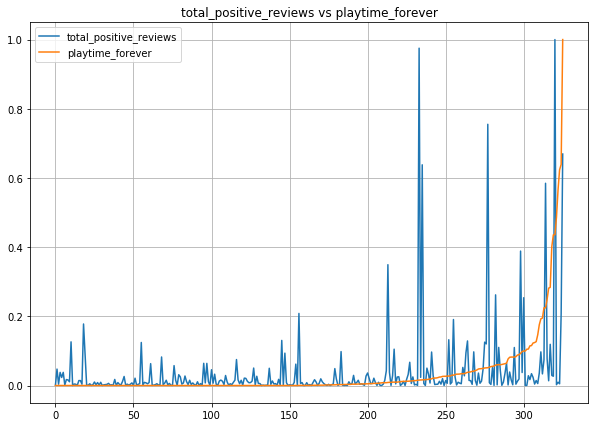

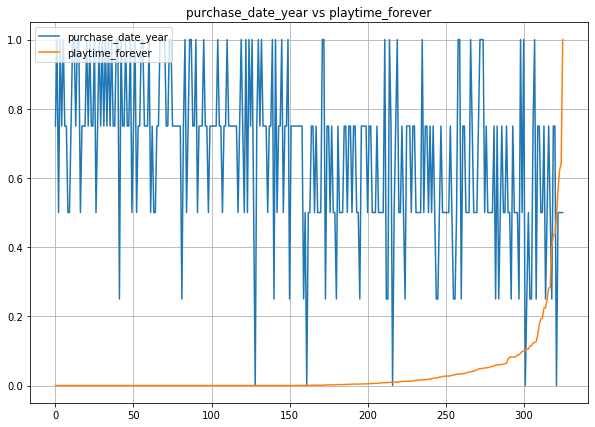

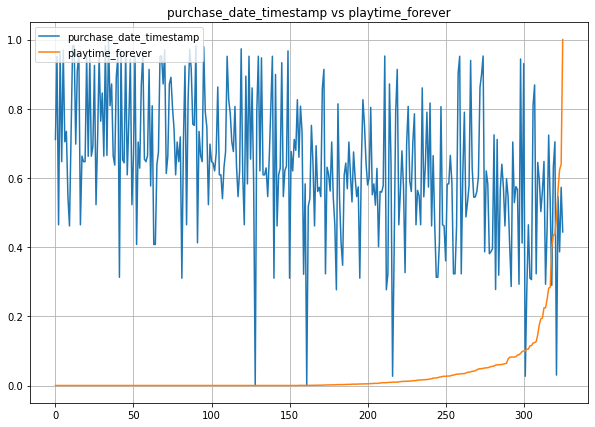

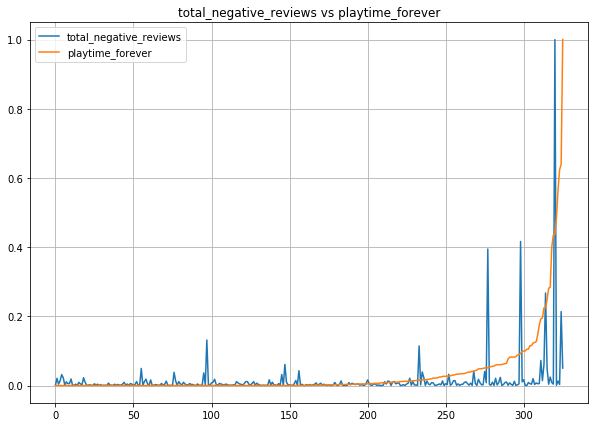

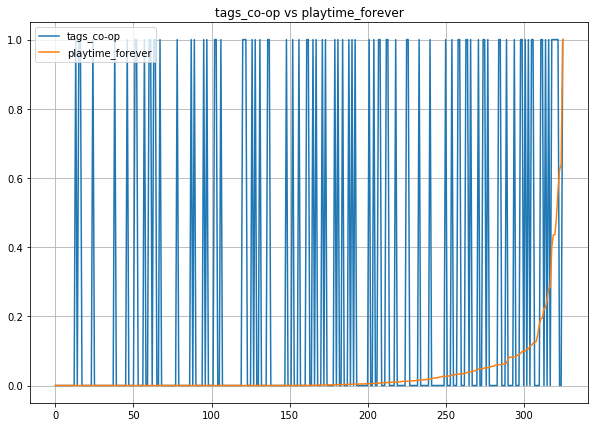

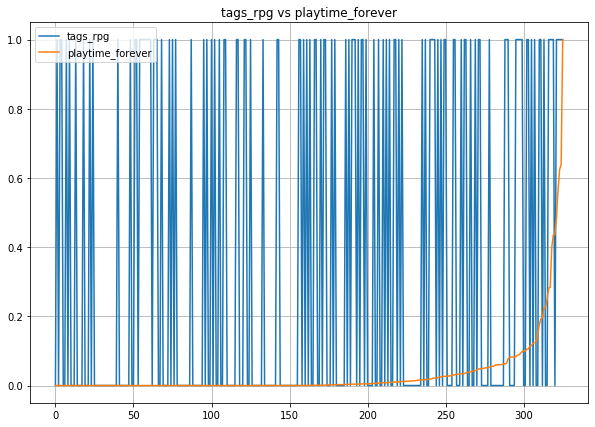

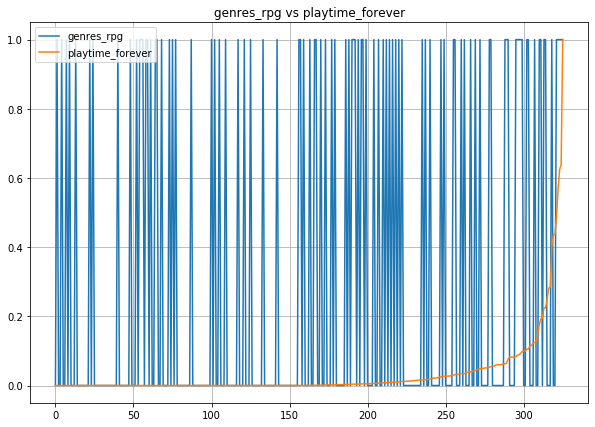

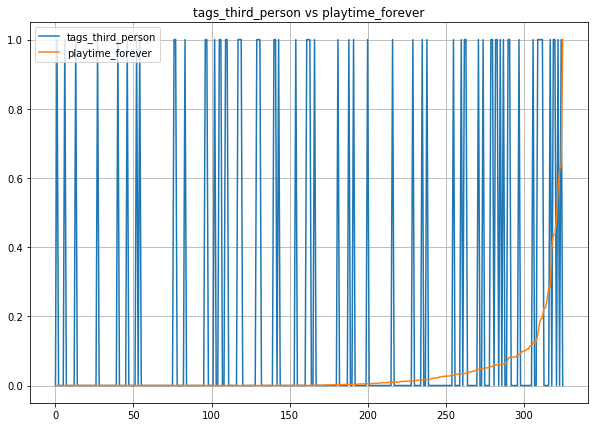

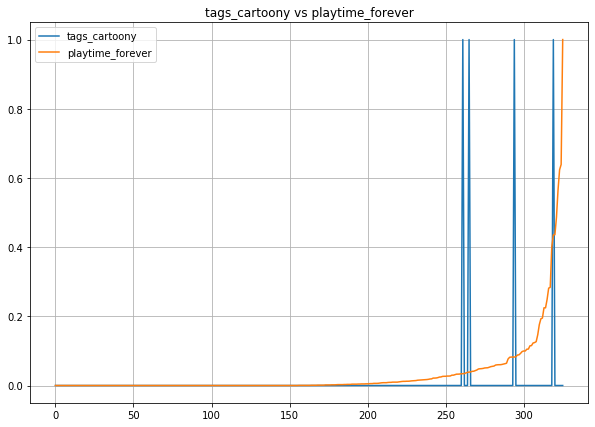

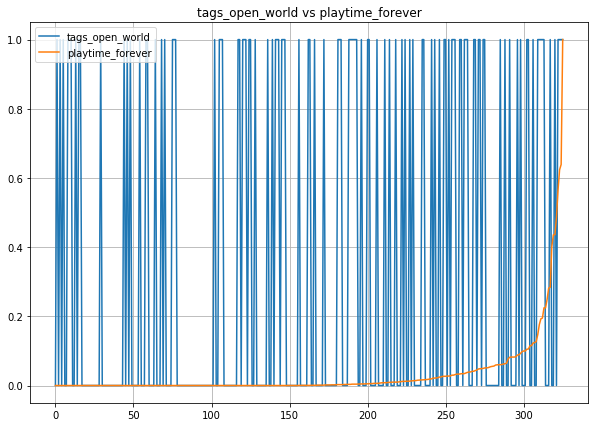

In [18]:
best_features.append('playtime_forever')
vis_cols = best_features
vis_df = dataset[vis_cols] 

vis_scaler = MinMaxScaler()
vis_df = pd.DataFrame(vis_scaler.fit_transform(vis_df), columns=vis_cols)

vis_df = vis_df.sort_values('playtime_forever')

for col in vis_cols:
    if col is not 'playtime_forever':
        plt.figure(figsize=(10,7))
        plt.plot(range(0,vis_df.shape[0]),vis_df[col],label=col)
        plt.plot(range(0,vis_df.shape[0]),vis_df['playtime_forever'],label="playtime_forever")
        plt.legend(loc='upper left')
        plt.title(col + ' vs playtime_forever')
        plt.grid()
        plt.show()

## 7) Train ML Model

### 7.1) Comparative study of different models:

In [19]:
models = {}
# linear models
models['LinearRegression: '] = LinearRegression()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for a in alpha:
    models['Lasso-'+str(a)] = Lasso(alpha=a)
    models['Ridge-'+str(a)] = Ridge(alpha=a)
for a1 in alpha:
    for a2 in alpha:
        name = 'ElasticNet-' + str(a1) + ',' + str(a2)
        models[name] = ElasticNet(a1, a2)
models['HuberRegressor'] = HuberRegressor()
models['Lars'] = Lars()
models['LassoLars'] = LassoLars()
models['PassiveAggressiveRegressor'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
# models['RANSACRegressor'] = RANSACRegressor()
models['SGDRegressor'] = SGDRegressor(max_iter=1000, tol=1e-3)
models['TheilSenRegressor'] = TheilSenRegressor()

# non-linear models
n_neighbors = range(1, 21)
for k in n_neighbors:
    models['knn-'+str(k)] = KNeighborsRegressor(n_neighbors=k)
models['DecisionTreeRegressor: '] = DecisionTreeRegressor()
models['ExtraTreeRegressor'] = ExtraTreeRegressor()
models['svml'] = SVR(kernel='linear')
models['svmp'] = SVR(kernel='poly')
c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for c in c_values:
    models['svmr-'+str(c)] = SVR(C=c)

# ensemble models
n_trees = 50
models['AdaBoostRegressor'] = AdaBoostRegressor(n_estimators=n_trees)
models['BaggingRegressor'] = BaggingRegressor(n_estimators=n_trees)
models['RandomForestRegressor'] = RandomForestRegressor(n_estimators=n_trees)
models['ExtraTreesRegressor'] = ExtraTreesRegressor(n_estimators=n_trees)
# models['GradientBoostingRegressor'] = GradientBoostingRegressor(n_estimators=n_trees)


min_result = 1000
filtered_models = {}
scoring = 'neg_mean_squared_error'
# print(scoring)
# print('------------------------')
# for name,model in models.items():
# #     kfold = StratifiedKFold(n_splits=10, random_state=42)
#     kfold = KFold(n_splits=10, shuffle = True, random_state=6)
#     result = cross_val_score(model, X[X_train.columns], Y, cv=kfold, scoring=scoring).mean()
#     print(name,result)
#     if int(abs(min_result)) < int(abs(result)):
#         min_result = result
#         filtered_models[name] = model

### 7.2) Filtered models

In [20]:

# filtered_models['Lasso'] = Lasso(alpha=0.9)
# filtered_models['ElasticNet'] = ElasticNet(1.0, 1.0)

# filtered_models['KNeighborsRegressor'] = KNeighborsRegressor(n_neighbors=7)

# filtered_models['SVMR'] = SVR(C=1.0) # the predictions are too small

# n_trees = 50
# filtered_models['AdaBoostRegressor'] = AdaBoostRegressor(n_estimators=n_trees)
# filtered_models['BaggingRegressor'] = BaggingRegressor(n_estimators=n_trees)
# filtered_models['RandomForestRegressor'] = RandomForestRegressor(n_estimators=n_trees)
# filtered_models['GradientBoostingRegressor'] = GradientBoostingRegressor(n_estimators=n_trees)

# chosen_model_name = None
# lowest_rmse = 100
# print('RMSE')
# print('-------')
# for name,model in filtered_models.items():
#     model.fit(X_train,Y_train)
#     Y_predicted = model.predict(X_test)
#     rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_predicted))
#     if rmse < lowest_rmse:
#         lowest_rmse = rmse
#         chosen_model_name = name
#     print(name + ': ', rmse)
    
# final_model = filtered_models[chosen_model_name]
# final_model.fit(X_train,Y_train)

## 8) Fit & Evaluation

### 8.1) Model Evaluation tool

In [21]:
def eval_model(model,X,Y,data_name):
    Y_predicted = model.predict(X)
    rmse = np.sqrt(metrics.mean_squared_error(Y,Y_predicted))
    print('RMSE ('+data_name+'): ',rmse)

    # multiple line plot
    plt.figure(figsize=(15,5))
    plt.plot(X.index,Y, '-',label="Y")
    plt.plot(X.index,Y_predicted, '-',label="Y_pred")
    plt.legend(loc='upper right')
    plt.title(data_name)
    plt.ylabel("Game Play Time (hr)")
    plt.grid()
    plt.show()
    
    print('----------------------------------------------------------------------------------------------------')
    
    
def three_way_eval(model):
    model.fit(X_train,Y_train)
    eval_model(model,X_train,Y_train,'Train set')
    eval_model(model,X_test,Y_test,'Test set')

    model.fit(X[X_test.columns],Y)
    eval_model(model,X[X_test.columns],Y,'Train & Test set')
    
    
def eval_rmse(model):
    model.fit(X_train,Y_train)
    Y_predicted = model.predict(X_train)
    rmse = np.sqrt(metrics.mean_squared_error(Y_train,Y_predicted))
    print('RMSE (Train set): ',rmse)
    
    Y_predicted = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_predicted))
    print('RMSE (Test set): ',rmse)

    model.fit(X[X_test.columns],Y)
    Y_predicted = model.predict(X[X_test.columns])
    rmse = np.sqrt(metrics.mean_squared_error(Y,Y_predicted))
    print('RMSE (Full set): ',rmse)

RMSE (Train set):  0.5071930456099301


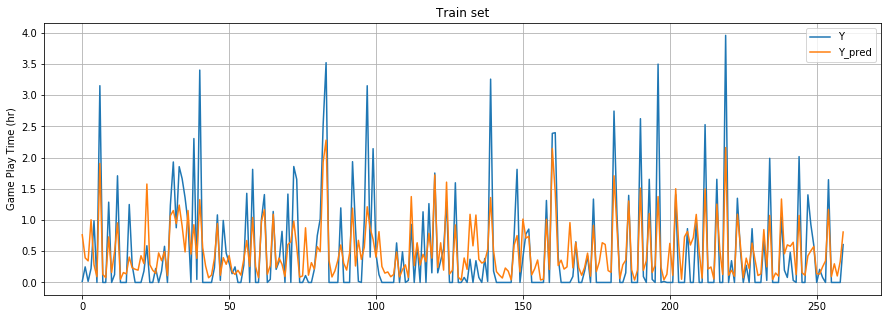

----------------------------------------------------------------------------------------------------
RMSE (Test set):  0.660029550688625


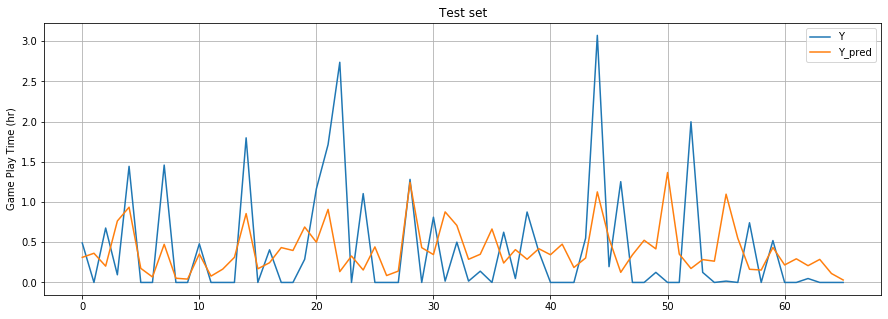

----------------------------------------------------------------------------------------------------
RMSE (Train & Test set):  0.5012296290886817


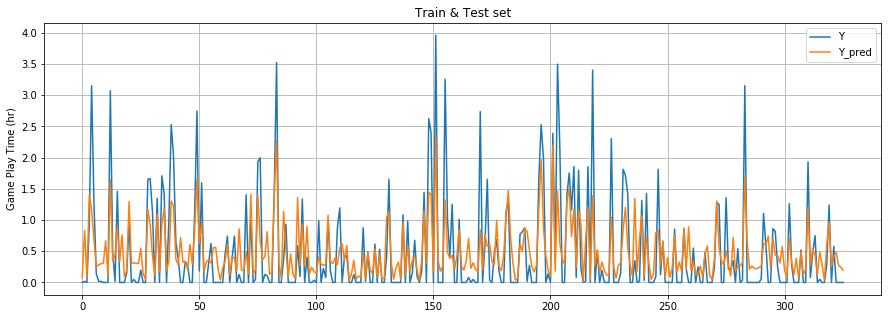

----------------------------------------------------------------------------------------------------


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [50,60,70],
    'max_features': [2,4,6,8],
    'min_samples_leaf': [2,3,4,5],
    'min_samples_split': [6,9,12],
    'n_estimators': [200,300]
}

# forest_reg = RandomForestRegressor()

# grid_search = GridSearchCV(estimator = forest_reg, param_grid = param_grid, scoring='neg_mean_squared_error', cv = 3, n_jobs = -1, verbose = 2)

# grid_search.fit(X[X_test.columns],Y)
# final_model = grid_search.best_estimator_
# print(final_model)


# rmse = 3.77
# final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
#                       max_features=2, max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=2, min_samples_split=6,
#                       min_weight_fraction_leaf=0.0, n_estimators=200,
#                       n_jobs=None, oob_score=False, random_state=None,
#                       verbose=0, warm_start=False)

final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

three_way_eval(final_model)

In [23]:
# KNeighborsRegressor ----------> Can't predict high values

# parameters = {
#     'weights': ['uniform', 'distance'], 
#     'n_neighbors': [90, 100, 217],
#     'leaf_size': [2,4,6,8,10]
# }

# knn_reg = KNeighborsRegressor()
# grid_search = GridSearchCV(estimator = knn_reg, param_grid = parameters, scoring='neg_mean_squared_error', cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X[X_test.columns],Y)
# final_model = grid_search.best_estimator_
# print(final_model)

# three_way_eval(final_model)

In [24]:
#  predictions never touch zero

# boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=0)
# parameters = {'n_estimators': [10,50,100],
#               'learning_rate' : [0.05,0.1,0.3,1],
#               'loss' : ['linear', 'square', 'exponential'],
#               'base_estimator__max_depth': [1, 2, 5]}
# grid_search = GridSearchCV(estimator=boost, param_grid=parameters, scoring='neg_mean_squared_error', cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X[X_test.columns],Y)
# final_model = grid_search.best_estimator_
# print(final_model)

# three_way_eval(final_model)

RMSE (Train set):  0.619794756598307


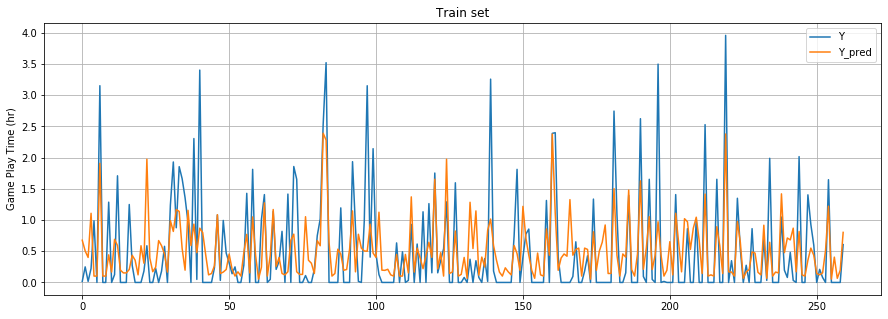

----------------------------------------------------------------------------------------------------
RMSE (Test set):  0.6731828721066137


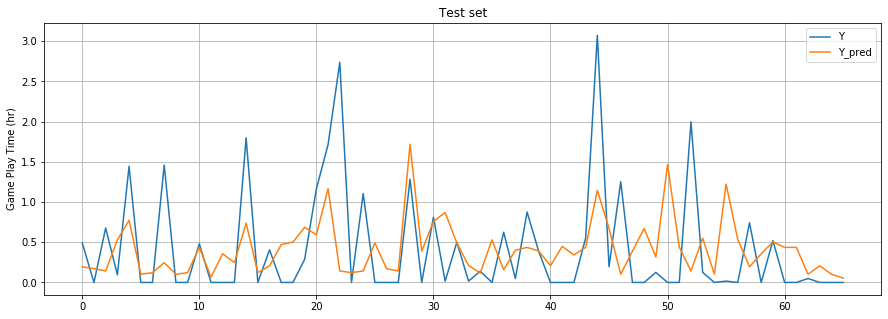

----------------------------------------------------------------------------------------------------
RMSE (Train & Test set):  0.6214694760550383


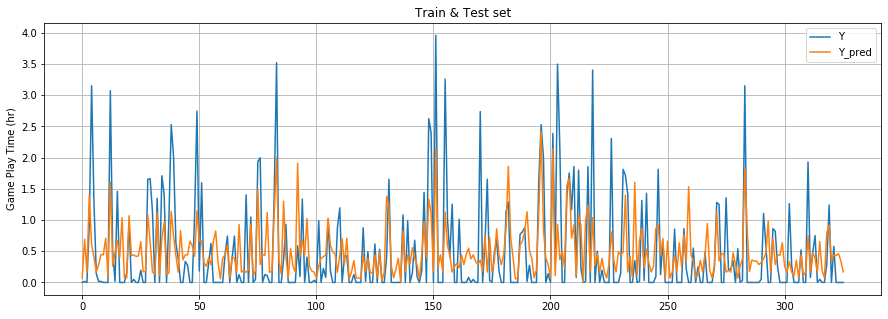

----------------------------------------------------------------------------------------------------


In [25]:
# GradientBoostingRegressor

# params_GBR_GS = {"max_depth": [1,2,3],
#               "max_features":['auto', 'sqrt', 'log2'],
#               "min_samples_split": [9,10, 11],
#               "min_samples_leaf": [8,9, 10],
#             'learning_rate':[0.265,0.275,0.3],
#             'n_estimators': [14,15,16]}
# grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=params_GBR_GS, scoring='neg_mean_squared_error', cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X[X_test.columns],Y)
# final_model = grid_search.best_estimator_
# print(final_model)

final_model = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='ls', max_depth=2,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=14,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

three_way_eval(final_model)

# for _ in range(10):
#     eval_rmse(final_model)
#     print('-----------------')

## 9) Prediction on given Test Data

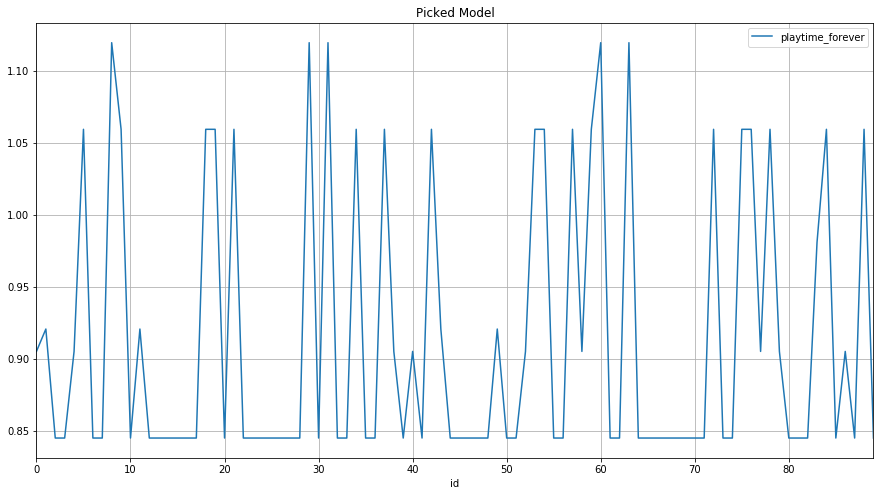

In [26]:
final_model.fit(X[X_test.columns],Y)
actual_predicted = final_model.predict(test_df)

ind = [i for i in range(len(actual_predicted))]
predicted_df = pd.DataFrame(actual_predicted)
predicted_df.columns = ['playtime_forever']
predicted_df.index.name = 'id'

predicted_df.plot(figsize=(15,8), grid = True, title='Picked Model')

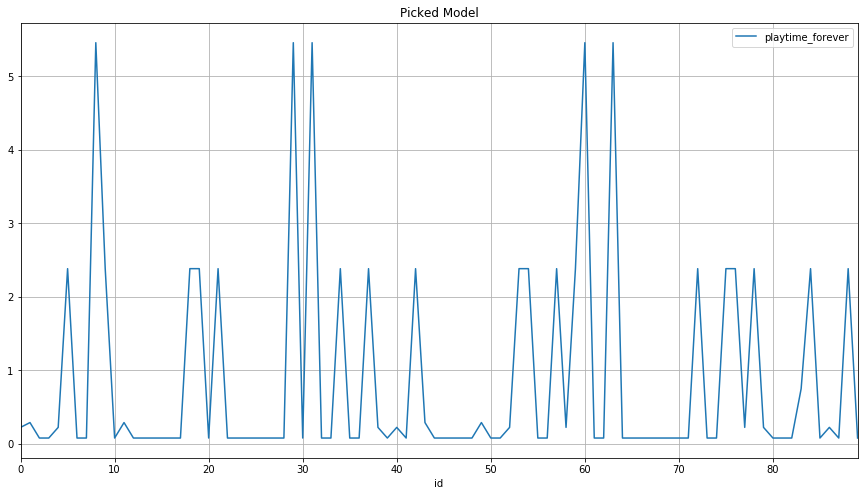

In [27]:
predicted_df = predicted_df.apply(lambda x: np.power(x, 15))
predicted_df.plot(figsize=(15,8), grid = True, title='Picked Model')
predicted_df.to_csv('submission.csv')